In [169]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [292]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [293]:
df = read_data()

In [294]:
model = sort_important_features(df)

feature: space, importance: 0.20130838797531236
feature: ppron, importance: 0.06006655513327232
feature: ipron, importance: 0.038671812105248435
feature: assent, importance: 0.027843175587968172
feature: power, importance: 0.025757286065789815
feature: relig, importance: 0.022018508464715102
feature: you, importance: 0.01969911927039081
feature: sad_2q, importance: 0.019097517020547093
feature: i, importance: 0.018969223161419718
feature: affect_1h, importance: 0.017731860447548035
feature: work, importance: 0.016988463379203414
feature: shehe, importance: 0.016980152276965116
feature: focuspresent, importance: 0.015460510056364556
feature: prep, importance: 0.015262586927100344
feature: tentat, importance: 0.015133135084372853
feature: drives, importance: 0.013451025646232134
feature: death, importance: 0.013259776426580395
feature: achieve, importance: 0.012768610625550156
feature: reward, importance: 0.011228680138706128
feature: WPS, importance: 0.010212430191776969
feature: Purity

In [173]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [ ]:
print_tree(model)

## Random Forest

In [289]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [290]:
rf, importances, names = sort_important_features(df)

feature: ppron, importance: 0.07422497024506632
feature: sad_2q, importance: 0.05611864159261983
feature: pronoun, importance: 0.04664501476931603
feature: affect_change_q, importance: 0.032131472712827465
feature: shehe, importance: 0.02947515123324219
feature: ingest, importance: 0.025573420961410735
feature: i, importance: 0.02356405203490585
feature: relig, importance: 0.023212417005215046
feature: feel, importance: 0.023208830500430388
feature: achieve, importance: 0.019624782124376926
feature: ipron, importance: 0.018798158358296107
feature: work, importance: 0.017699728479924938
feature: adverb, importance: 0.01414281033000386
feature: drives, importance: 0.01355756257658899
feature: certain, importance: 0.012977986758218086
feature: money, importance: 0.011011775352754024
feature: negemo_4q, importance: 0.010909127202541247
feature: function, importance: 0.010653789873864528
feature: negate, importance: 0.009992209367423389
feature: hear, importance: 0.009894154213223039
featur

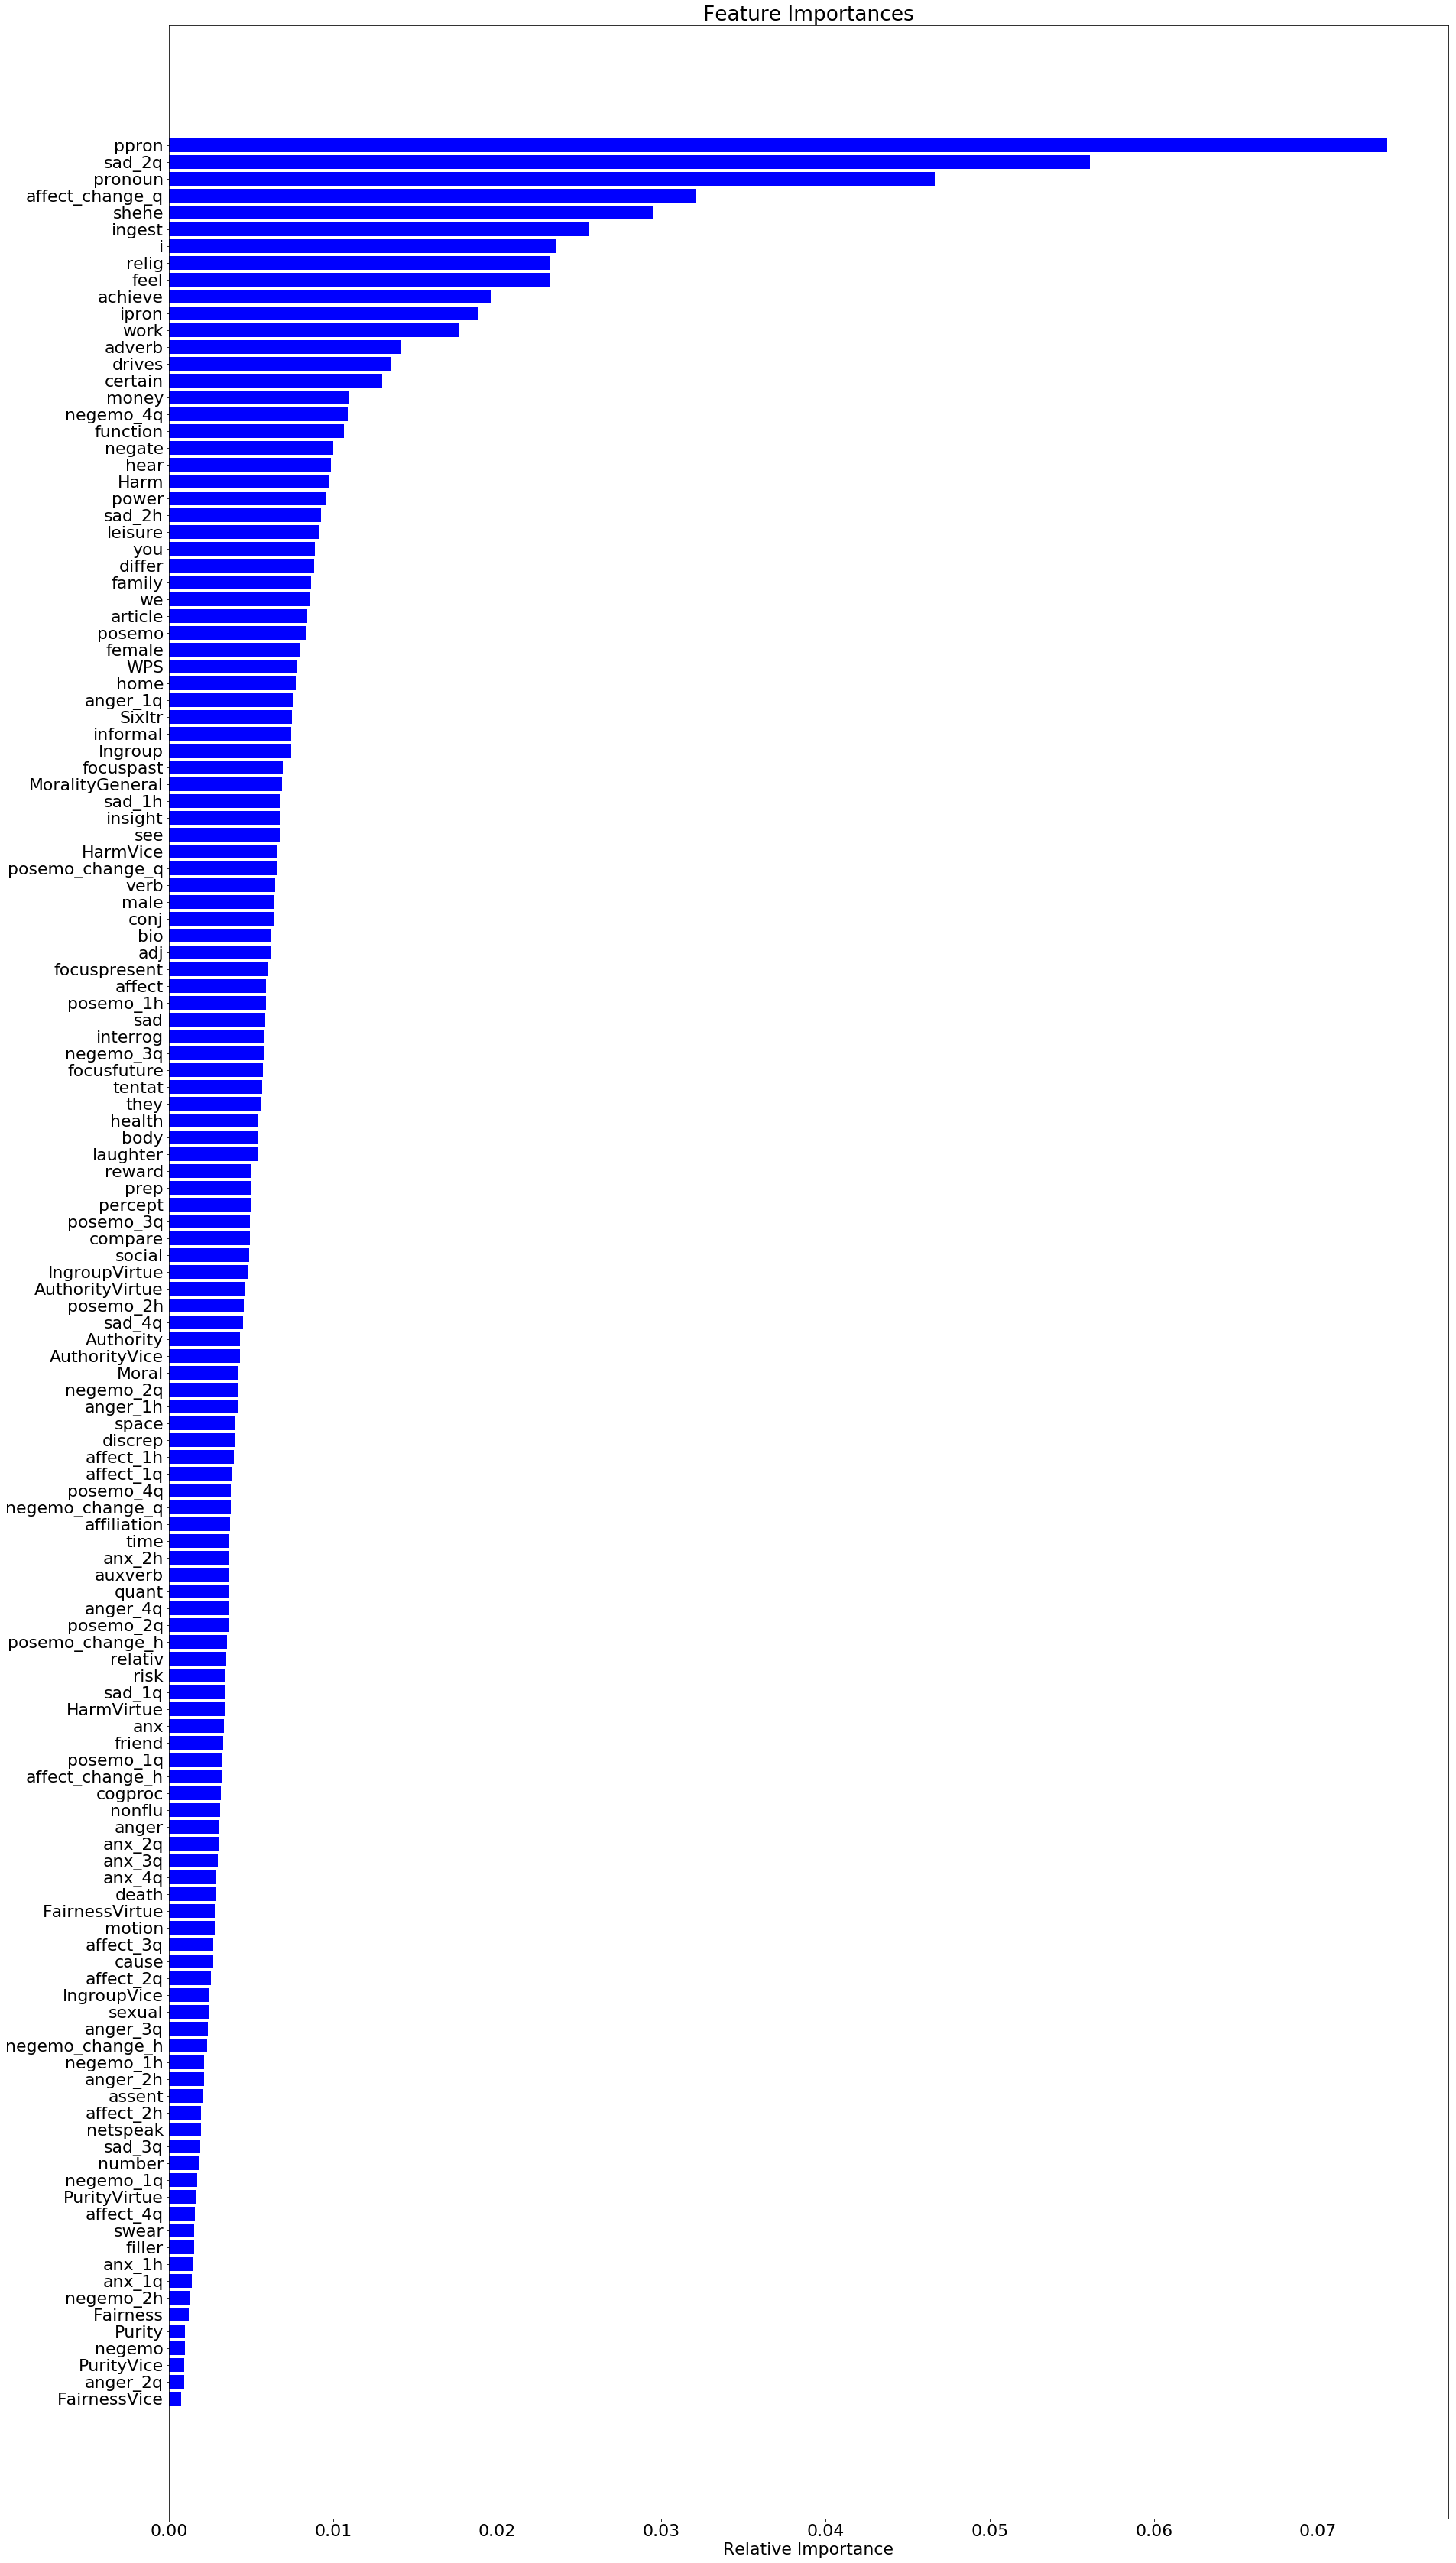

In [291]:

plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [ ]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

In [295]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['assent','IngroupVice','we','i','social','focuspast','sad_2q','relig','achieve','power']
    lr.fit(df[predictors], df['norm_inspiring'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_inspiring'], X2)
    est2 = est.fit()
    print(est2.summary())

In [296]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:         norm_inspiring   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     34.89
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           4.42e-64
Time:                        23:41:51   Log-Likelihood:                -16764.
No. Observations:                2406   AIC:                         3.355e+04
Df Residuals:                    2395   BIC:                         3.361e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -84.9667     26.568     -3.198      